In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import datetime
import re
import json

In [3]:
        with open('ram_fincorp_output.json','r') as fl:

            jsonObj = json.load(fl)

        df_bc_fin = pd.json_normalize(jsonObj)

In [4]:
df_bc_fin.head()

,report_id,leadID,dataFlag,fbs_v1,income_calculated,income_calculated_v2,obligation,overdebt_flag,dpd_risk_flag,summary.bureau_name,...,summary.cnt_bl_inquries_last_1m,summary.max_dpd_inlast6months,summary.enquiry_unsecured_last3months,summary.max_dpd_cc_inlast12months,summary.max_dpd_cc_inlast6months,summary.max_dpd_cc_inlast3months,summary.max_dpd_non_cc_inlast12months,summary.max_dpd_non_cc_inlast6months,summary.max_dpd_non_cc_inlast3months,summary
0,101493_0,101493,Data Found,821.0,22447.59,22447.590000,37377.86,1.0,1.0,CIBIL,...,0.0,33.0,12.0,33.0,33.0,33.0,29.0,29.0,29.0,NaN
1,102164_1,102164,Error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102081_2,102081,Data Found,753.0,42120.62,42120.620000,48956.08,1.0,0.0,CIBIL,...,0.0,0.0,23.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
3,70872_3,70872,Error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60352_4,60352,Data Found,778.0,174497.37,393801.776633,45656.56,1.0,1.0,CIBIL,...,0.0,900.0,3.0,0.0,0.0,0.0,900.0,900.0,900.0,NaN


In [5]:
df_bc_fin.shape

(10140, 271)

In [6]:
df_bc_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10140 entries, 0 to 10139
Columns: 271 entries, report_id to summary
dtypes: float64(244), object(27)
memory usage: 21.0+ MB


In [7]:
df_bc_fin['dataFlag'].value_counts()

Data Found    8054
Error         2022
No Data         64
Name: dataFlag, dtype: int64

In [10]:
bc_fin = df_bc_fin[df_bc_fin['dataFlag'] == 'Data Found']

In [11]:
bc_fin.shape

(8054, 271)

In [13]:
pd.set_option('display.max_columns', None)
bc_fin.head(1)

,report_id,leadID,dataFlag,fbs_v1,income_calculated,income_calculated_v2,obligation,overdebt_flag,dpd_risk_flag,summary.bureau_name,summary.amt_pos_unsecured_loans,summary.new_open_acc_last30days,summary.max_loan_amount_serviced_last2year,summary.max_loan_amount_serviced_last6months,summary.settlement_writtenoff,summary.settlement_writtenoff_last12months,summary.total_writtenoff_amt,summary.amts_writtenoff_last24months,summary.max_credit_card_limit_last2year,summary.max_emi_serviced_last2year,summary.max_overdue,summary.sum_active_overdue_amount,summary.new_open_acc_gt_1lac_non_cc_last60days,summary.new_open_acc_lte_1lac_non_cc_last60days,summary.new_open_acc_non_cc_last60days,summary.sum_tradelines_balance,summary.total_outstanding_amount,summary.total_sanctioned_amount_cc,summary.total_outstanding_amount_cc,summary.total_sanctioned_amount_od,summary.total_outstanding_amount_od,summary.total_sanctioned_amount_active_pl_bl,summary.total_outstanding_amount_active_pl_bl,summary.total_outstanding_amount_non_cc_cd_gl,summary.total_sanctioned_active_amount_non_cc_cd_gl,summary.total_outstanding_amount_active_non_cc_cd_gl,summary.total_sanctioned_amount_non_hl_al_cc_cd_gl,summary.total_outstanding_amount_non_hl_al_cc_cd_gl,summary.tradeline_max_balance,summary.tradeline_max_balance_24months,summary.sanction_active_pl_cd_loan,summary.settlement_writtenoff_last24months,summary.settlement_writtenoff_individual_joint_24months,summary.settlement_writtenoff_non_cc_individual_joint_12months,summary.settlement_writtenoff_non_cc_individual_joint_18months,summary.settlement_writtenoff_non_cc_individual_joint_24months,summary.last3months_pymt_max_dpd,summary.max_dpd_last_6_mo,summary.max_dpd_inlast12months,summary.max_dpd_inlast24months,summary.max_dpd_inlast36months,summary.max_dpd_active_account_last_3_mo,summary.max_dpd_active_account_last_6_mo,summary.max_dpd_active_account_last_12_mo,summary.max_dpd_active_account_last_24_mo,summary.max_dpd_active_account_last_36_mo,summary.max_dpd_cc_last_3mo,summary.max_dpd_cc_last_6mo,summary.max_dpd_cc_last_12mo,summary.max_dpd_non_cc_last_3mo,summary.max_dpd_non_cc_last_6mo,summary.max_dpd_non_cc_last_12mo,summary.max_dpd_pl_inlast12months,summary.max_dpd_unsecured_inlast6months,summary.max_dpd_secured_inlast6months,summary.bureau_score_name,summary.bureauscore,summary.bureau_score_bucket,summary.max_credit_card_limit_last2year_reported_date,summary.cb_recent_age,summary.age_fraud_flag,summary.cb_mode_age,summary.cb_recent_income,summary.cb_recent_income_date,summary.recent_employment_type,summary.median_income,summary.different_employment_type,summary.last3pymt_max_dpd,summary.last3pymt_max_dpd_date,summary.last3pymt_max_dpd_last12months,summary.last3pymt_max_dpd_last12months_date,summary.most_recent_dpd,summary.most_recent_dpd_last12months,summary.max_dpd_current_active_account,summary.cb_recent_verified_income,summary.median_verified_income,summary.cb_recent_verified_income_date,summary.employment_type_recent_date,summary.written_off_flag,summary.settled_written_off_flag,summary.written_off_gt_1000_flag,summary.payments_reported_zero_dpd,summary.prin_run_off,summary.od_utilization_perc,summary.cc_utilization_percentage,summary.is_suitfiled_willfuldefault_writtenoffstatus_last24months,summary.is_suitfiled_wilfuldefault_last24months,summary.is_settled_writtenoff_suitfiled_last24months,summary.days_since_first_closed,summary.days_since_first_opened,summary.days_since_last_closed,summary.days_since_last_opened,summary.first_account_type_opened,summary.last_account_type_opened,summary.max_dpd_ever,summary.max_dpd_secured_1_year,summary.max_dpd_secured_ever,summary.max_dpd_unsecured_1_year,summary.max_dpd_unsecured_ever,summary.percentage_installments_defaulted,summary.sum_active_overdue_amount_non_cc_cd_gl,summary.total_outstanding_amount_secured,summary.total_outstanding_amount_unsecured,summary.total_sanctioned_balance_secured,summary.total_sanctioned_balance_unsecured,summary.sum_outstanding_bal_act

In [17]:
# Read JSON file into DataFrame
rest_cibil = pd.read_json('cibil_json.json')

In [18]:
rest_cibil.shape

(3602, 2)

In [19]:
rest_cibil.head()

,leadID,api_response
0,99101,null
1,59898,null
2,89318,null
3,101493,"{""is_success"":true,""apimsg"":{""controlData"":{""..."
4,102164,"{""is_success"":true,""apimsg"":{""controlData"":{""..."


In [22]:

# Convert 'leadId' column to integer type for both dataframes
rest_cibil['leadID'] = rest_cibil['leadID'].astype(int)
bc_fin['leadID'] = bc_fin['leadID'].astype(int)

# Merge the two dataframes on the 'leadId' column
#merged_df = all_detail.merge(df1, on="leadID")


json_extr= rest_cibil.merge(bc_fin, on='leadID')

C:\Users\HP\AppData\Local\Temp\ipykernel_19252\3825927674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_fin['leadID'] = bc_fin['leadID'].astype(int)


In [23]:
json_extr.head()

,leadID,api_response,report_id,dataFlag,fbs_v1,income_calculated,income_calculated_v2,obligation,overdebt_flag,dpd_risk_flag,summary.bureau_name,summary.amt_pos_unsecured_loans,summary.new_open_acc_last30days,summary.max_loan_amount_serviced_last2year,summary.max_loan_amount_serviced_last6months,summary.settlement_writtenoff,summary.settlement_writtenoff_last12months,summary.total_writtenoff_amt,summary.amts_writtenoff_last24months,summary.max_credit_card_limit_last2year,summary.max_emi_serviced_last2year,summary.max_overdue,summary.sum_active_overdue_amount,summary.new_open_acc_gt_1lac_non_cc_last60days,summary.new_open_acc_lte_1lac_non_cc_last60days,summary.new_open_acc_non_cc_last60days,summary.sum_tradelines_balance,summary.total_outstanding_amount,summary.total_sanctioned_amount_cc,summary.total_outstanding_amount_cc,summary.total_sanctioned_amount_od,summary.total_outstanding_amount_od,summary.total_sanctioned_amount_active_pl_bl,summary.total_outstanding_amount_active_pl_bl,summary.total_outstanding_amount_non_cc_cd_gl,summary.total_sanctioned_active_amount_non_cc_cd_gl,summary.total_outstanding_amount_active_non_cc_cd_gl,summary.total_sanctioned_amount_non_hl_al_cc_cd_gl,summary.total_outstanding_amount_non_hl_al_cc_cd_gl,summary.tradeline_max_balance,summary.tradeline_max_balance_24months,summary.sanction_active_pl_cd_loan,summary.settlement_writtenoff_last24months,summary.settlement_writtenoff_individual_joint_24months,summary.settlement_writtenoff_non_cc_individual_joint_12months,summary.settlement_writtenoff_non_cc_individual_joint_18months,summary.settlement_writtenoff_non_cc_individual_joint_24months,summary.last3months_pymt_max_dpd,summary.max_dpd_last_6_mo,summary.max_dpd_inlast12months,summary.max_dpd_inlast24months,summary.max_dpd_inlast36months,summary.max_dpd_active_account_last_3_mo,summary.max_dpd_active_account_last_6_mo,summary.max_dpd_active_account_last_12_mo,summary.max_dpd_active_account_last_24_mo,summary.max_dpd_active_account_last_36_mo,summary.max_dpd_cc_last_3mo,summary.max_dpd_cc_last_6mo,summary.max_dpd_cc_last_12mo,summary.max_dpd_non_cc_last_3mo,summary.max_dpd_non_cc_last_6mo,summary.max_dpd_non_cc_last_12mo,summary.max_dpd_pl_inlast12months,summary.max_dpd_unsecured_inlast6months,summary.max_dpd_secured_inlast6months,summary.bureau_score_name,summary.bureauscore,summary.bureau_score_bucket,summary.max_credit_card_limit_last2year_reported_date,summary.cb_recent_age,summary.age_fraud_flag,summary.cb_mode_age,summary.cb_recent_income,summary.cb_recent_income_date,summary.recent_employment_type,summary.median_income,summary.different_employment_type,summary.last3pymt_max_dpd,summary.last3pymt_max_dpd_date,summary.last3pymt_max_dpd_last12months,summary.last3pymt_max_dpd_last12months_date,summary.most_recent_dpd,summary.most_recent_dpd_last12months,summary.max_dpd_current_active_account,summary.cb_recent_verified_income,summary.median_verified_income,summary.cb_recent_verified_income_date,summary.employment_type_recent_date,summary.written_off_flag,summary.settled_written_off_flag,summary.written_off_gt_1000_flag,summary.payments_reported_zero_dpd,summary.prin_run_off,summary.od_utilization_perc,summary.cc_utilization_percentage,summary.is_suitfiled_willfuldefault_writtenoffstatus_last24months,summary.is_suitfiled_wilfuldefault_last24months,summary.is_settled_writtenoff_suitfiled_last24months,summary.days_since_first_closed,summary.days_since_first_opened,summary.days_since_last_closed,summary.days_since_last_opened,summary.first_account_type_opened,summary.last_account_type_opened,summary.max_dpd_ever,summary.max_dpd_secured_1_year,summary.max_dpd_secured_ever,summary.max_dpd_unsecured_1_year,summary.max_dpd_unsecured_ever,summary.percentage_installments_defaulted,summary.sum_active_overdue_amount_non_cc_cd_gl,summary.total_outstanding_amount_secured,summary.total_outstanding_amount_unsecured,summary.total_sanctioned_balance_secured,summary.total_sanctioned_balance_unsecured,summary.sum_outsta

In [24]:
json_extr.shape

(3056, 272)

In [53]:
# Drop duplicates based on column 'A'
json_extr = json_extr.drop_duplicates(subset=['leadID'])

In [54]:
json_extr.shape

(2761, 272)

In [29]:
#rev_eng= json_extr.sample(3)

In [58]:
#rev_eng.to_csv('sample_to_build_feature.csv',index= False)

In [59]:
#rev_eng = pd.read_csv('sample_to_build_feature.csv')

In [55]:
rev_eng.head()

,leadID,api_response,report_id,dataFlag,fbs_v1,income_calculated,income_calculated_v2,obligation,overdebt_flag,dpd_risk_flag,summary.bureau_name,summary.amt_pos_unsecured_loans,summary.new_open_acc_last30days,summary.max_loan_amount_serviced_last2year,summary.max_loan_amount_serviced_last6months,summary.settlement_writtenoff,summary.settlement_writtenoff_last12months,summary.total_writtenoff_amt,summary.amts_writtenoff_last24months,summary.max_credit_card_limit_last2year,summary.max_emi_serviced_last2year,summary.max_overdue,summary.sum_active_overdue_amount,summary.new_open_acc_gt_1lac_non_cc_last60days,summary.new_open_acc_lte_1lac_non_cc_last60days,summary.new_open_acc_non_cc_last60days,summary.sum_tradelines_balance,summary.total_outstanding_amount,summary.total_sanctioned_amount_cc,summary.total_outstanding_amount_cc,summary.total_sanctioned_amount_od,summary.total_outstanding_amount_od,summary.total_sanctioned_amount_active_pl_bl,summary.total_outstanding_amount_active_pl_bl,summary.total_outstanding_amount_non_cc_cd_gl,summary.total_sanctioned_active_amount_non_cc_cd_gl,summary.total_outstanding_amount_active_non_cc_cd_gl,summary.total_sanctioned_amount_non_hl_al_cc_cd_gl,summary.total_outstanding_amount_non_hl_al_cc_cd_gl,summary.tradeline_max_balance,summary.tradeline_max_balance_24months,summary.sanction_active_pl_cd_loan,summary.settlement_writtenoff_last24months,summary.settlement_writtenoff_individual_joint_24months,summary.settlement_writtenoff_non_cc_individual_joint_12months,summary.settlement_writtenoff_non_cc_individual_joint_18months,summary.settlement_writtenoff_non_cc_individual_joint_24months,summary.last3months_pymt_max_dpd,summary.max_dpd_last_6_mo,summary.max_dpd_inlast12months,summary.max_dpd_inlast24months,summary.max_dpd_inlast36months,summary.max_dpd_active_account_last_3_mo,summary.max_dpd_active_account_last_6_mo,summary.max_dpd_active_account_last_12_mo,summary.max_dpd_active_account_last_24_mo,summary.max_dpd_active_account_last_36_mo,summary.max_dpd_cc_last_3mo,summary.max_dpd_cc_last_6mo,summary.max_dpd_cc_last_12mo,summary.max_dpd_non_cc_last_3mo,summary.max_dpd_non_cc_last_6mo,summary.max_dpd_non_cc_last_12mo,summary.max_dpd_pl_inlast12months,summary.max_dpd_unsecured_inlast6months,summary.max_dpd_secured_inlast6months,summary.bureau_score_name,summary.bureauscore,summary.bureau_score_bucket,summary.max_credit_card_limit_last2year_reported_date,summary.cb_recent_age,summary.age_fraud_flag,summary.cb_mode_age,summary.cb_recent_income,summary.cb_recent_income_date,summary.recent_employment_type,summary.median_income,summary.different_employment_type,summary.last3pymt_max_dpd,summary.last3pymt_max_dpd_date,summary.last3pymt_max_dpd_last12months,summary.last3pymt_max_dpd_last12months_date,summary.most_recent_dpd,summary.most_recent_dpd_last12months,summary.max_dpd_current_active_account,summary.cb_recent_verified_income,summary.median_verified_income,summary.cb_recent_verified_income_date,summary.employment_type_recent_date,summary.written_off_flag,summary.settled_written_off_flag,summary.written_off_gt_1000_flag,summary.payments_reported_zero_dpd,summary.prin_run_off,summary.od_utilization_perc,summary.cc_utilization_percentage,summary.is_suitfiled_willfuldefault_writtenoffstatus_last24months,summary.is_suitfiled_wilfuldefault_last24months,summary.is_settled_writtenoff_suitfiled_last24months,summary.days_since_first_closed,summary.days_since_first_opened,summary.days_since_last_closed,summary.days_since_last_opened,summary.first_account_type_opened,summary.last_account_type_opened,summary.max_dpd_ever,summary.max_dpd_secured_1_year,summary.max_dpd_secured_ever,summary.max_dpd_unsecured_1_year,summary.max_dpd_unsecured_ever,summary.percentage_installments_defaulted,summary.sum_active_overdue_amount_non_cc_cd_gl,summary.total_outstanding_amount_secured,summary.total_outstanding_amount_unsecured,summary.total_sanctioned_balance_secured,summary.total_sanctioned_balance_unsecured,summary.sum_outsta

In [218]:
# Select only the first two columns by index
df = rev_eng.iloc[:, :2]

In [219]:
df.head()

,leadID,api_response
2014,129696,"{""is_success"":true,""apimsg"":{""controlData"":{""..."
1244,124280,"{""is_success"":true,""apimsg"":{""controlData"":{""..."
872,122259,"{""is_success"":true,""apimsg"":{""controlData"":{""..."


In [220]:
# import pandas as pd
# import json

# # Assuming `df` is your dataframe and 'api_response' is the column with JSON strings
# # Replace 'df' with the name of your actual dataframe variable

# # Define a function to parse and normalize the JSON data
# def parse_json(data):
#     try:
#         # Parse the JSON string into a dictionary
#         return json.loads(data)
#     except json.JSONDecodeError:
#         # In case the JSON is not well-formed, we return NaN
#         return pd.NA

# # Apply the function to each row in the 'api_response' column
# #df['parsed_json'] = df['api_response'].apply(parse_json)

# # Now, you may want to normalize the JSON data and convert it to separate columns
# # This will depend on the structure of your JSON data. If it's flat, it's straightforward
# # If it's nested, you may need to apply json_normalize more carefully
# for index, row in df.iterrows():
#     if pd.notna(row['parsed_json']):
#         normalized = pd.json_normalize(row['parsed_json'])
#         for col in normalized.columns:
#             df.at[index, col] = normalized.at[0, col]

# # Drop the original 'api_response' and 'parsed_json' columns if you no longer need them
# #df = df.drop(columns=['api_response', 'parsed_json'])

# # Now your dataframe `df` should have new columns corresponding to the fields in the JSON


In [221]:
df.head()

,leadID,api_response
2014,129696,"{""is_success"":true,""apimsg"":{""controlData"":{""..."
1244,124280,"{""is_success"":true,""apimsg"":{""controlData"":{""..."
872,122259,"{""is_success"":true,""apimsg"":{""controlData"":{""..."


In [133]:
df.columns

Index(['leadID', 'api_response', 'parsed_json', 'is_success',
       'apimsg.controlData.success', 'apimsg.consumerCreditData',
       'apimsg.consumerSummaryData.accountSummary.totalAccounts',
       'apimsg.consumerSummaryData.accountSummary.overdueAccounts',
       'apimsg.consumerSummaryData.accountSummary.zeroBalanceAccounts',
       'apimsg.consumerSummaryData.accountSummary.highCreditAmount',
       'apimsg.consumerSummaryData.accountSummary.currentBalance',
       'apimsg.consumerSummaryData.accountSummary.overdueBalance',
       'apimsg.consumerSummaryData.accountSummary.recentDateOpened',
       'apimsg.consumerSummaryData.accountSummary.oldestDateOpened',
       'apimsg.consumerSummaryData.inquirySummary.totalInquiry',
       'apimsg.consumerSummaryData.inquirySummary.inquiryPast30Days',
       'apimsg.consumerSummaryData.inquirySummary.inquiryPast12Months',
       'apimsg.consumerSummaryData.inquirySummary.inquiryPast24Months',
       'apimsg.consumerSummaryData.inquirySumm

In [117]:
df.head()

,leadID,is_success,apimsg.controlData.success,apimsg.consumerSummaryData.accountSummary.totalAccounts,apimsg.consumerSummaryData.accountSummary.overdueAccounts,apimsg.consumerSummaryData.accountSummary.zeroBalanceAccounts,apimsg.consumerSummaryData.accountSummary.highCreditAmount,apimsg.consumerSummaryData.accountSummary.currentBalance,apimsg.consumerSummaryData.accountSummary.overdueBalance,apimsg.consumerSummaryData.accountSummary.recentDateOpened,apimsg.consumerSummaryData.accountSummary.oldestDateOpened,apimsg.consumerSummaryData.inquirySummary.totalInquiry,apimsg.consumerSummaryData.inquirySummary.inquiryPast30Days,apimsg.consumerSummaryData.inquirySummary.inquiryPast12Months,apimsg.consumerSummaryData.inquirySummary.inquiryPast24Months,apimsg.consumerSummaryData.inquirySummary.recentInquiryDate,2014_names,2014_ids,2014_telephones,2014_emails,2014_scores,2014_addresses,2014_accounts,2014_enquiries,2014_tuefHeader.headerType,2014_tuefHeader.version,2014_tuefHeader.memberRefNo,2014_tuefHeader.enquiryMemberUserId,2014_tuefHeader.subjectReturnCode,2014_tuefHeader.enquiryControlNumber,2014_tuefHeader.dateProcessed,2014_tuefHeader.timeProcessed,1244_names,1244_ids,1244_telephones,1244_emails,1244_employment,1244_scores,1244_addresses,1244_accounts,1244_enquiries,1244_tuefHeader.headerType,1244_tuefHeader.version,1244_tuefHeader.memberRefNo,1244_tuefHeader.enquiryMemberUserId,1244_tuefHeader.subjectReturnCode,1244_tuefHeader.enquiryControlNumber,1244_tuefHeader.dateProcessed,1244_tuefHeader.timeProcessed,872_names,872_ids,872_telephones,872_emails,872_employment,872_scores,872_addresses,872_accounts,872_enquiries,872_tuefHeader.headerType,872_tuefHeader.version,872_tuefHeader.memberRefNo,872_tuefHeader.enquiryMemberUserId,872_tuefHeader.subjectReturnCode,872_tuefHeader.enquiryControlNumber,872_tuefHeader.dateProcessed,872_tuefHeader.timeProcessed
872,122259,True,True,43.0,3.0,36.0,4330585.0,3704525.0,9002.0,24052023,25032019,34.0,2.0,9.0,9.0,25052023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,124280,True,True,95.0,6.0,75.0,26229265.0,6241750.0,142991.0,11042023,12032011,67.0,1.0,35.0,19.0,18052023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,129696,True,True,5.0,0.0,2.0,2007108.0,1493700.0,0.0,25052023,26042018,17.0,2.0,13.0,2.0,22062023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
specific_entry = df['apimsg.consumerCreditData'].iloc[0]

In [112]:
type(specific_entry)

dict

In [113]:
print(specific_entry)

{'tuefHeader': {'headerType': 'TUEF', 'version': '12', 'memberRefNo': 'NB8851', 'enquiryMemberUserId': 'NB88518888_CIRC2CNPE', 'subjectReturnCode': 1, 'enquiryControlNumber': '006027117095', 'dateProcessed': '22062023', 'timeProcessed': '173247'}, 'names': [{'index': 'N01', 'name': 'SADHANA KUMARI D/O NULL NULL NULL', 'birthDate': '08011971', 'gender': '2'}], 'ids': [{'index': 'I01', 'idType': '01', 'idNumber': 'DVIPK6400E'}, {'index': 'I02', 'idType': '05', 'idNumber': '8156423/845'}, {'index': 'I03', 'idType': '06', 'idNumber': '438519990131'}], 'telephones': [{'index': 'T01', 'telephoneNumber': '919934741459', 'telephoneType': '00'}, {'index': 'T02', 'telephoneNumber': '9934741459', 'telephoneType': '01'}, {'index': 'T03', 'telephoneNumber': '06299556379', 'telephoneType': '03'}, {'index': 'T04', 'telephoneNumber': '06200007452', 'telephoneType': '02'}], 'emails': [{'index': 'C01', 'emailID': 'DEEPAKMES8@GMAIL.COM'}, {'index': 'C02', 'emailID': 'KUMARISADHANA123@GMAIL.COM'}], 'score

In [222]:
# Define a function to parse the JSON data and extract the fields
def parse_json(row):
    try:
        # Load the JSON data from the api_response column
        response = json.loads(row['api_response'])
        
        # Extract the relevant fields from the JSON data
        is_success = response.get('is_success', None)
        cibil_fetch_date = response['apimsg']['consumerCreditData'][0]['tuefHeader']['dateProcessed']
        names = response['apimsg']['consumerCreditData'][0]['names'][0]['name']
        birth_date = response['apimsg']['consumerCreditData'][0]['names'][0]['birthDate']
        gender = response['apimsg']['consumerCreditData'][0]['names'][0]['gender']
        score = response['apimsg']['consumerCreditData'][0]['scores'][0]['score']
        total_accounts= response['apimsg']['consumerSummaryData']['accountSummary']['totalAccounts']
        overdue_accounts= response['apimsg']['consumerSummaryData']['accountSummary']['overdueAccounts']
        closed_accounts= response['apimsg']['consumerSummaryData']['accountSummary']['zeroBalanceAccounts']
        total_sanctioned_amount= response['apimsg']['consumerSummaryData']['accountSummary']['highCreditAmount']
        total_current_balance_rem= response['apimsg']['consumerSummaryData']['accountSummary']['currentBalance']
        total_overdue_running= response['apimsg']['consumerSummaryData']['accountSummary']['overdueBalance']
        recent_account_opened= response['apimsg']['consumerSummaryData']['accountSummary']['recentDateOpened']
        total_current_balance_rem= response['apimsg']['consumerSummaryData']['accountSummary']['oldestDateOpened']
        total_enquiry= response['apimsg']['consumerSummaryData']['inquirySummary']['totalInquiry']
        last_30_days_enq= response['apimsg']['consumerSummaryData']['inquirySummary']['inquiryPast30Days']
        last_12_days_enq= response['apimsg']['consumerSummaryData']['inquirySummary']['inquiryPast12Months']
        last_24_days_enq= response['apimsg']['consumerSummaryData']['inquirySummary']['inquiryPast24Months']
        recent_enq_done= response['apimsg']['consumerSummaryData']['inquirySummary']['recentInquiryDate']
        
        
        ###############################################################################################################
        
        #We need to Extract all ID details from the cibil response
        
        # Extracting account details
        identities = response['apimsg']['consumerCreditData'][0].get('ids', [])
        
        # Initialize a dictionary to hold account details
        identities_data = {
            'id_type': [],
            'id_number': [],
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for identity in identities:
            identities_data['id_type'].append(identity.get('idType', ''))
            identities_data['id_number'].append(identity.get('idNumber', ''))
         
        
        ########################################################################################################   
        
        #########################################################################################################
        
        #We need to Extract all TELEPHONE details from the cibil response
        
        # Extracting account details
        telephones = response['apimsg']['consumerCreditData'][0].get('telephones', [])
        
        # Initialize a dictionary to hold account details
        telephones_data = {
            'telephone_number': [],
            'telephone_type': [],
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for telephone in telephones:
            telephones_data['telephone_number'].append(telephone.get('telephoneNumber', ''))
            telephones_data['telephone_type'].append(telephone.get('telephoneType', ''))
            
        
        ########################################################################################################
        
        #########################################################################################################
        
        #We need to Extract all EMAIL details from the cibil response
        
        # Extracting account details
        emails = response['apimsg']['consumerCreditData'][0].get('emails', [])
        
        # Initialize a dictionary to hold account details
        emails_data = {
            'emailID': [],
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for email in emails:
            emails_data['emailID'].append(email.get('emailID', ''))
                    
        
        ########################################################################################################
        
        #########################################################################################################
        
        #We need to Extract all ADDRESS details from the cibil response
        
        # Extracting account details
        addresses = response['apimsg']['consumerCreditData'][0].get('addresses', [])
        
        # Initialize a dictionary to hold account details
        addresses_data = {
            'addr_line1': [],
            'addr_line2': [],
            'addr_stateCode': [],
            'addr_pincode': [],
            'addr_category': [],
            'addr_reported': [],

            

            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for address in addresses:
            addresses_data['addr_line1'].append(address.get('line1', ''))
            addresses_data['addr_line2'].append(address.get('line2', ''))
            addresses_data['addr_stateCode'].append(address.get('stateCode', ''))
            addresses_data['addr_pincode'].append(address.get('pinCode', ''))
            addresses_data['addr_category'].append(address.get('addressCategory', ''))
            addresses_data['addr_reported'].append(address.get('dateReported', ''))
                    
        
        ########################################################################################################


        # Extracting account details
        accounts = response['apimsg']['consumerCreditData'][0].get('accounts', [])
        
        # Initialize a dictionary to hold account details
        accounts_data = {
            'account_type': [],
            'ownership_indicator': [],
            'date_reported': [],
            "date_opened":[],
            "highCreditAmount":[],
            "currentBalance":[],
            "paymentHistory":[],
            "paymentStartDate":[],
            "paymentEndDate":[],
            "paymentFrequency":[]
            
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for account in accounts:
            accounts_data['account_type'].append(account.get('accountType', ''))
            accounts_data['ownership_indicator'].append(account.get('ownershipIndicator', ''))
            accounts_data['date_reported'].append(account.get('dateReported', ''))
            accounts_data['date_opened'].append(account.get('dateOpened', ''))
            accounts_data['highCreditAmount'].append(account.get('highCreditAmount', ''))
            accounts_data['currentBalance'].append(account.get('currentBalance', ''))
            accounts_data['paymentHistory'].append(account.get('paymentHistory', ''))
            accounts_data['paymentStartDate'].append(account.get('paymentStartDate', ''))
            accounts_data['paymentEndDate'].append(account.get('paymentEndDate', ''))
            accounts_data['paymentFrequency'].append(account.get('paymentFrequency', ''))
            # Extract other account details as necessary
            
      #######################################################################################################
        
        #similarly we need to extract all ENQUIRY details from the cibil response
        
        # Extracting account details
        enquiries = response['apimsg']['consumerCreditData'][0].get('enquiries', [])
        
        # Initialize a dictionary to hold account details
        enquiries_data = {
            'enquiry_date': [],
            'enquiry_purpose': [],
            'enquiry_amount': [],
            
            
            # Add other fields as necessary
        }

        # Iterate over each account and extract details
        for enquiry in enquiries:
            enquiries_data['enquiry_date'].append(enquiry.get('enquiryDate', ''))
            enquiries_data['enquiry_purpose'].append(enquiry.get('enquiryPurpose', ''))
            enquiries_data['enquiry_amount'].append(enquiry.get('enquiryAmount', ''))
            
        
        
    #########################################################################################################        
        # Return the extracted data as a Series (which will be converted to columns)
        return pd.Series({
            'is_success': is_success,
            'cibil_fetch_date':cibil_fetch_date,
            'name': names,
            'birth_date': birth_date,
            'gender': gender,
            'score': score,
            'total_accounts' :total_accounts,
            'overdue_accounts': overdue_accounts,
            'closed_accounts': closed_accounts,
            'total_sanctioned_amount': total_sanctioned_amount,
            'total_current_balance_rem': total_current_balance_rem,
            'total_overdue_running': total_overdue_running,
            'recent_account_opened': recent_account_opened,
            'total_current_balance_rem': total_current_balance_rem, # Duplicate variable, consider renaming if needed
            'total_enquiry': total_enquiry,
            'last_30_days_enq': last_30_days_enq,
            'last_12_days_enq': last_12_days_enq,
            'last_24_days_enq': last_24_days_enq,
            'recent_enq_done': recent_enq_done,

        
            'accounts': json.dumps(accounts_data),  # Convert the dictionary to a JSON string to store in the DataFrame
            'enquiries': json.dumps(enquiries_data),
            'identities': json.dumps(identities_data),
            'telephones' : json.dumps(telephones_data),
            'emails' : json.dumps(emails_data),
            'addresses' : json.dumps(addresses_data)
            
        })
    except json.JSONDecodeError:
        # In case the JSON data is invalid
        print('Invalid JSON')
        return pd.Series({
            'is_success': None,
            'cibil_fetch_date':None,
            'name': None,
            'birth_date': None,
            'gender': None,
            'score': None,
            'total_accounts': None,
            'overdue_accounts': None,
            'closed_accounts': None,
            'total_sanctioned_amount': None,
            'total_current_balance_rem': None,
            'total_overdue_running': None,
            'recent_account_opened': None,
            'total_current_balance_rem': None,  
            'total_enquiry': None,
            'last_30_days_enq': None,
            'last_12_days_enq': None,
            'last_24_days_enq': None,
            'recent_enq_done': None,
            'accounts': None,  
            'enquiries': None,
            'identities': None,
            'telephones': None,
            'emails': None,
            'addresses': None
            

        })

# Apply the function to each row of the DataFrame
parsed_columns = df.apply(parse_json, axis=1)

# Drop the original columns that will be replaced by the parsed data
#df.drop(columns=['is_success'], inplace=True)
# Drop the original columns that will be replaced by the parsed data
df.drop(columns=['api_response'], inplace=True)  # Make sure to drop the column with the original JSON data if not needed anymore

# Join the parsed columns to the original DataFrame
df = df.join(parsed_columns)


In [223]:
df.head()

,leadID,is_success,cibil_fetch_date,name,birth_date,gender,score,total_accounts,overdue_accounts,closed_accounts,total_sanctioned_amount,total_current_balance_rem,total_overdue_running,recent_account_opened,total_enquiry,last_30_days_enq,last_12_days_enq,last_24_days_enq,recent_enq_done,accounts,enquiries,identities,telephones,emails,addresses
2014,129696,True,22062023,SADHANA KUMARI D/O NULL NULL NULL,08011971,2,00733,5,0,2,2007108,26042018,0,25052023,17,2,13,2,22062023,"{""account_type"": [""05"", ""06"", ""05"", ""05"", ""05""...","{""enquiry_date"": [""22062023"", ""22062023"", ""190...","{""id_type"": [""01"", ""05"", ""06""], ""id_number"": [...","{""telephone_number"": [""919934741459"", ""9934741...","{""emailID"": [""DEEPAKMES8@GMAIL.COM"", ""KUMARISA...","{""addr_line1"": [""H/O KAMESHWAR PR SINGH NAYA T..."
1244,124280,True,14062023,SIVVA RANJITH KUMAR NOT-AVAIL,28081979,2,00755,95,6,75,26229265,12032011,142991,11042023,67,1,35,19,18052023,"{""account_type"": [""10"", ""05"", ""00"", ""10"", ""10""...","{""enquiry_date"": [""18052023"", ""10052023"", ""060...","{""id_type"": [""01"", ""02"", ""03"", ""06""], ""id_numb...","{""telephone_number"": [""9100387767"", ""910038776...","{""emailID"": [""SIVVERANJITH@GMAIL.COM"", ""RANJIT...","{""addr_line1"": [""FLAT#202 PLOT NO 34 SUNRISE A..."
872,122259,True,10062023,PRASHANT KESHAV CHAVAN,26111991,2,00706,43,3,36,4330585,25032019,9002,24052023,34,2,9,9,25052023,"{""account_type"": [""05"", ""05"", ""05"", ""05"", ""05""...","{""enquiry_date"": [""25052023"", ""24052023"", ""100...","{""id_type"": [""01"", ""04"", ""06""], ""id_number"": [...","{""telephone_number"": [""9773344429"", ""226702406...","{""emailID"": [""PCDESING999@GMAIL.COM"", ""PRASHAN...","{""addr_line1"": [""401 PATEL INDUSTRIAL EASTATE""..."


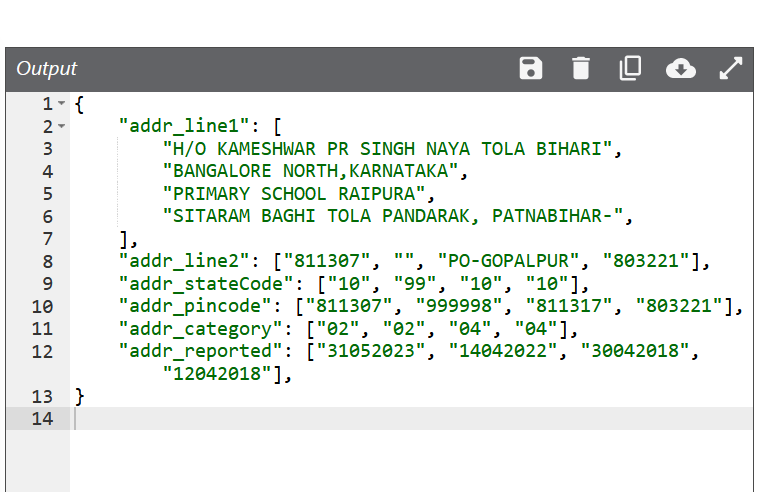


PLEASE NOTE THAT MAPPING IS CORRESPONDING FOR EXAMPLE FOR EACH COLUMN IN THE DATAFRAME 


"addresses":[{"index":"A01","line1":"H/O KAMESHWAR PR SINGH NAYA TOLA BIHARI","line2":"811307","stateCode":"10","pinCode":"811307","addressCategory":"02","dateReported":"31052023"},{"index":"A02","line1":"BANGALORE NORTH,KARNATAKA","stateCode":"99","pinCode":"999998","addressCategory":"02","dateReported":"14042022","enquiryEnriched":"Y"},{"index":"A03","line1":"PRIMARY SCHOOL RAIPURA","line2":"PO-GOPALPUR","line3":"JAMUI","line4":"JAMUI","stateCode":"10","pinCode":"811317","addressCategory":"04","dateReported":"30042018"},{"index":"A04","line1":"SITARAM BAGHI TOLA PANDARAK, PATNABIHAR-","line2":"803221","line4":"PATNA","line5":"PATNA","stateCode":"10","pinCode":"803221","addressCategory":"04","dateReported":"12042018"}]

In [199]:
df.shape

(3, 22)

In [224]:
# Select a specific column entry using indexing
specific_entry = df['addresses'].iloc[0]

#copying to clipboard to check the json response in json viewer 
import pyperclip

pyperclip.copy(specific_entry)